In [27]:
import warnings
warnings.filterwarnings('ignore')
import pandexo.engine.justdoit as jdi 
import numpy as np
import os

In [28]:
exo_dict = jdi.load_exo_dict('WASP-39 b')

exo_dict['observation']['sat_level'] = 80    #saturation level in percent of full well 
exo_dict['observation']['sat_unit'] = '%'
exo_dict['observation']['noccultations'] = 1 #number of transits 
exo_dict['observation']['R'] = None         
exo_dict['observation']['baseline_unit'] = 'frac'  #'frac' : fraction of time in transit versus out = in/out 
                                                    
exo_dict['observation']['baseline'] = 2 

exo_dict['observation']['noise_floor'] = 7   # units are ppm

In [30]:
exo_dict['planet']['type'] ='user'                       #tells pandexo you are uploading your own spectrum
exo_dict['planet']['exopath'] = 'wasp-39b_model.txt'
exo_dict['planet']['w_unit'] = 'um'                      
exo_dict['planet']['f_unit'] = 'rp^2/r*^2'               

In [31]:
result = jdi.run_pandexo(exo_dict,['NIRSpec Prism'], verbose = True)

Running Single Case for: NIRSpec Prism
Optimization Reqested: Computing Duty Cycle
Finished Duty Cycle Calc
Starting Out of Transit Simulation
End out of Transit
Starting In Transit Simulation
End In Transit


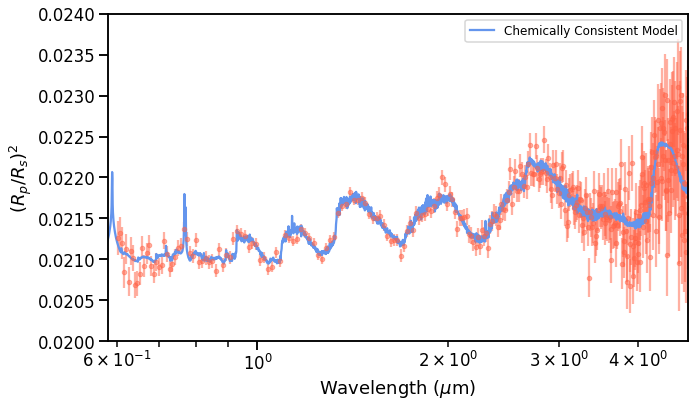

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
plt.figure(figsize = (10,6))
plt.plot(result['OriginalInput']['model_wave'], result['OriginalInput']['model_spec'], color="cornflowerblue", label = "Chemically Consistent Model")
plt.errorbar(result['FinalSpectrum']['wave'], result['FinalSpectrum']['spectrum_w_rand'],yerr=result['FinalSpectrum']['error_w_floor'],fmt = ".",  color = "tomato", alpha = 0.5)#plt.ylim(0.105,0.12)
plt.ylim(0.02, 0.024)
plt.xlim(0.58, 4.8)
plt.xscale('log')
plt.xlabel(r"Wavelength ($\mu$m)")
plt.ylabel(r"$(R_p/R_s)^2$")
plt.legend(prop={'size': 12})
plt.tight_layout()